In [1]:
# AeroCNN-I
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import datetime
%matplotlib inline

In [2]:
n_units=32
l2Regularizer=1e-09
kernel_size = 2
n_grid = 101
strides = 1
input_size = 49

In [3]:
alpha = np.array([-10, -2, -4, -6, -8, 0, 10, 12, 14, 16, 18, 20, 2, 4, 6, 8])

In [4]:
alpha_train = alpha[-7:-4].reshape((3, 1))
alpha_test = alpha[-4:].reshape((4,1))

In [5]:
aa_train = np.zeros((3*113,1))
for i in range(0, 113):
    aa_train[3*i:3*(i+1), :] = alpha_train[:,:]
aa_test = np.zeros((4*113,1))
for i in range(0, 113):
    aa_test[4*i:4*(i+1), :] = alpha_test[:,:]

In [6]:
aa_train = aa_train.reshape((113*3,1,1))
aa_test = aa_test.reshape((113*4,1,1))

In [7]:
os.chdir('D:\\')

In [8]:
data = pd.read_csv('datasetList.csv', header=None)

In [9]:
x = data.iloc[:, 0].values

In [10]:
x = x.reshape((1,113))
x_train = np.vstack((x,x,x))
x_test = np.vstack((x,x,x,x))
geo_train = x_train.T.reshape((113*3,1))
geo_test = x_test.T.reshape((113*4,1))

In [11]:
os.chdir('D:\\airfoilInputs')

In [12]:
path = 'D:\\airfoilInputs\\'
file_list = os.listdir('D:\\airfoilInputs')
file_list_py = [file for file in file_list if file.endswith('.dat')]
df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_table(path + i, sep='\s+', header=None)
    print(data.shape)
    df = pd.concat([df, data], axis=0)

(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)
(49, 2)


In [13]:
out = df.iloc[:, :].values

In [14]:
out.shape # 49(point 개수))*113(데이터셋 개수)//2: x, y coordinate

(5537, 2)

In [15]:
out_train = np.vstack((out,out,out))
out_test = np.vstack((out,out,out,out))

In [16]:
out_train = out_train.reshape((113*3,49,2))
out_test = out_test.reshape((113*4,49,2))

In [17]:
os.chdir('D:\\')

In [18]:
path = 'D:\\airfoilOutputs\\'
file_list = os.listdir('D:\\airfoilOutputs')
file_list_py = [file for file in file_list if file.endswith('.csv')]

In [19]:
file_list_train_py = []
file_list_test_py = []
for i in range(0, 113):
    file_list_train_py.append(file_list_py[16*i+9])
    file_list_train_py.append(file_list_py[16*i+10])
    file_list_train_py.append(file_list_py[16*i+11])
    
    file_list_test_py.append(file_list_py[16*i+12])
    file_list_test_py.append(file_list_py[16*i+13])
    file_list_test_py.append(file_list_py[16*i+14])
    file_list_test_py.append(file_list_py[16*i+15])
#file_list_train_py = str(file_list_train_py)
#file_list_test_py = str(file_list_test_py)

In [20]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for i in file_list_train_py:
    data_train = pd.read_csv(path + str(i), header=None)
    df_train = pd.concat([df_train, data_train], axis=0)
for i in file_list_test_py:
    data_test = pd.read_csv(path + str(i), header=None)
    df_test = pd.concat([df_test, data_test], axis=0)

In [21]:
y_train = df_train.iloc[:, :].values
y_test = df_test.iloc[:, :].values

In [22]:
y_train = y_train.reshape((113*3,n_grid,n_grid))
y_test = y_test.reshape((113*4,n_grid,n_grid))

In [23]:
input_coord = tf.keras.Input(shape=(49,2,1))
input_alpha = tf.keras.Input(shape=(1,))

x_conv = tf.keras.layers.Conv2D(n_units, (kernel_size, kernel_size), strides=(strides, strides), activation='relu', padding='valid',
                                    kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer),
                                    name='Conv2DLayer')(input_coord)
x_ = tf.keras.layers.MaxPooling2D((2, 1))(x_conv)
reshape1 = tf.keras.layers.Reshape((24*n_units,))(x_)
reshape2 = tf.keras.layers.Reshape((1,))(input_alpha)
x_concat = tf.keras.layers.Concatenate(axis=1)([reshape1, reshape2])

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_concat)
'''x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fifthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(l2Regularizer))(x_)'''
output_data = tf.keras.layers.Dense(units=n_grid*n_grid, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((n_grid, n_grid))(output_data)
# MLP
sd1 = tf.keras.Model([input_coord, input_alpha], output_image)

In [24]:
sd1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 49, 2, 1)]   0           []                               
                                                                                                  
 Conv2DLayer (Conv2D)           (None, 48, 1, 32)    160         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 24, 1, 32)    0           ['Conv2DLayer[0][0]']            
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                              

In [25]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
start = datetime.datetime.now()
history = sd1.fit([out_train,aa_train], y_train, epochs=5000, shuffle=True)
end = datetime.datetime.now()

Epoch 1/5000
11/11 [==============================] - 5s 13ms/step - loss: 24.5101 - rmse: 4.9508
Epoch 2/5000
11/11 [==============================] - 0s 7ms/step - loss: 21.5520 - rmse: 4.6424
Epoch 3/5000
11/11 [==============================] - 0s 6ms/step - loss: 17.6911 - rmse: 4.2061
Epoch 4/5000
11/11 [==============================] - 0s 6ms/step - loss: 12.4316 - rmse: 3.5258
Epoch 5/5000
11/11 [==============================] - 0s 6ms/step - loss: 5.7464 - rmse: 2.3972
Epoch 6/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.9164 - rmse: 0.9573
Epoch 7/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.4743 - rmse: 0.6887
Epoch 8/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.2611 - rmse: 0.5110
Epoch 9/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.2018 - rmse: 0.4493
Epoch 10/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1834 - rmse: 0.4282
Epoch 11/5000
11/11 [=============

11/11 [==============================] - 0s 5ms/step - loss: 0.1459 - rmse: 0.3820
Epoch 169/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1456 - rmse: 0.3815
Epoch 170/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1458 - rmse: 0.3818
Epoch 171/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1463 - rmse: 0.3825
Epoch 172/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1457 - rmse: 0.3816
Epoch 173/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1448 - rmse: 0.3805
Epoch 174/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1448 - rmse: 0.3806
Epoch 175/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1446 - rmse: 0.3802
Epoch 176/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1452 - rmse: 0.3811
Epoch 177/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1440 - rmse: 0.3795
Epoch 178/5000
11/11 [=============

11/11 [==============================] - 0s 5ms/step - loss: 0.1313 - rmse: 0.3624
Epoch 335/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1314 - rmse: 0.3625
Epoch 336/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1318 - rmse: 0.3631
Epoch 337/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1313 - rmse: 0.3623
Epoch 338/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1313 - rmse: 0.3624
Epoch 339/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1311 - rmse: 0.3621
Epoch 340/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1309 - rmse: 0.3619
Epoch 341/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1315 - rmse: 0.3626
Epoch 342/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1310 - rmse: 0.3620
Epoch 343/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1311 - rmse: 0.3620
Epoch 344/5000
11/11 [=============

11/11 [==============================] - 0s 5ms/step - loss: 0.1296 - rmse: 0.3601
Epoch 501/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1306 - rmse: 0.3615
Epoch 502/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1298 - rmse: 0.3603
Epoch 503/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1304 - rmse: 0.3611
Epoch 504/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1305 - rmse: 0.3612
Epoch 505/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1296 - rmse: 0.3599
Epoch 506/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1299 - rmse: 0.3604
Epoch 507/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1299 - rmse: 0.3604
Epoch 508/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1295 - rmse: 0.3599
Epoch 509/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1289 - rmse: 0.3591
Epoch 510/5000
11/11 [=============

11/11 [==============================] - 0s 5ms/step - loss: 0.1290 - rmse: 0.3591
Epoch 667/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1293 - rmse: 0.3596
Epoch 668/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1301 - rmse: 0.3607
Epoch 669/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1290 - rmse: 0.3592
Epoch 670/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1298 - rmse: 0.3602
Epoch 671/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1294 - rmse: 0.3597
Epoch 672/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1288 - rmse: 0.3589
Epoch 673/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1296 - rmse: 0.3600
Epoch 674/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1284 - rmse: 0.3583
Epoch 675/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1285 - rmse: 0.3585
Epoch 676/5000
11/11 [=============

11/11 [==============================] - 0s 5ms/step - loss: 0.1287 - rmse: 0.3588
Epoch 833/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1282 - rmse: 0.3581
Epoch 834/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1285 - rmse: 0.3585
Epoch 835/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1296 - rmse: 0.3600
Epoch 836/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1291 - rmse: 0.3593
Epoch 837/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1284 - rmse: 0.3584
Epoch 838/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1284 - rmse: 0.3583
Epoch 839/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1283 - rmse: 0.3582
Epoch 840/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1291 - rmse: 0.3593
Epoch 841/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1291 - rmse: 0.3593
Epoch 842/5000
11/11 [=============

11/11 [==============================] - 0s 5ms/step - loss: 0.1288 - rmse: 0.3589
Epoch 999/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1282 - rmse: 0.3581
Epoch 1000/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1279 - rmse: 0.3577
Epoch 1001/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1282 - rmse: 0.3581
Epoch 1002/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1283 - rmse: 0.3582
Epoch 1003/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1280 - rmse: 0.3577
Epoch 1004/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1284 - rmse: 0.3583
Epoch 1005/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1288 - rmse: 0.3588
Epoch 1006/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1281 - rmse: 0.3580
Epoch 1007/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1281 - rmse: 0.3579
Epoch 1008/5000
11/11 [====

11/11 [==============================] - 0s 5ms/step - loss: 0.1281 - rmse: 0.3580
Epoch 1163/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1279 - rmse: 0.3576
Epoch 1164/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1282 - rmse: 0.3580
Epoch 1165/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1277 - rmse: 0.3573
Epoch 1166/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1279 - rmse: 0.3576
Epoch 1167/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1278 - rmse: 0.3575
Epoch 1168/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1280 - rmse: 0.3578
Epoch 1169/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1276 - rmse: 0.3572
Epoch 1170/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1278 - rmse: 0.3575
Epoch 1171/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1283 - rmse: 0.3581
Epoch 1172/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1280 - rmse: 0.3578
Epoch 1327/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1281 - rmse: 0.3579
Epoch 1328/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1283 - rmse: 0.3582
Epoch 1329/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1281 - rmse: 0.3579
Epoch 1330/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1294 - rmse: 0.3597
Epoch 1331/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1274 - rmse: 0.3570
Epoch 1332/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1279 - rmse: 0.3576
Epoch 1333/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1281 - rmse: 0.3579
Epoch 1334/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1288 - rmse: 0.3588
Epoch 1335/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1281 - rmse: 0.3579
Epoch 1336/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1276 - rmse: 0.3573
Epoch 1491/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1272 - rmse: 0.3567
Epoch 1492/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1274 - rmse: 0.3569
Epoch 1493/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1275 - rmse: 0.3571
Epoch 1494/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1272 - rmse: 0.3566
Epoch 1495/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1276 - rmse: 0.3571
Epoch 1496/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1276 - rmse: 0.3572
Epoch 1497/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1279 - rmse: 0.3576
Epoch 1498/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1274 - rmse: 0.3569
Epoch 1499/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1276 - rmse: 0.3572
Epoch 1500/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1268 - rmse: 0.3560
Epoch 1655/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1272 - rmse: 0.3566
Epoch 1656/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1272 - rmse: 0.3567
Epoch 1657/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1270 - rmse: 0.3563
Epoch 1658/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1270 - rmse: 0.3563
Epoch 1659/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1269 - rmse: 0.3562
Epoch 1660/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1272 - rmse: 0.3566
Epoch 1661/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1271 - rmse: 0.3565
Epoch 1662/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1275 - rmse: 0.3570
Epoch 1663/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1279 - rmse: 0.3576
Epoch 1664/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1267 - rmse: 0.3559
Epoch 1819/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1263 - rmse: 0.3555
Epoch 1820/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1265 - rmse: 0.3557
Epoch 1821/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1279 - rmse: 0.3576
Epoch 1822/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1276 - rmse: 0.3573
Epoch 1823/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1279 - rmse: 0.3577
Epoch 1824/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1266 - rmse: 0.3559
Epoch 1825/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1267 - rmse: 0.3560
Epoch 1826/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1272 - rmse: 0.3566
Epoch 1827/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1273 - rmse: 0.3568
Epoch 1828/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1272 - rmse: 0.3566
Epoch 1983/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1270 - rmse: 0.3563
Epoch 1984/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1261 - rmse: 0.3551
Epoch 1985/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1262 - rmse: 0.3552
Epoch 1986/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1263 - rmse: 0.3553
Epoch 1987/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1261 - rmse: 0.3551
Epoch 1988/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1264 - rmse: 0.3555
Epoch 1989/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1262 - rmse: 0.3553
Epoch 1990/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1263 - rmse: 0.3553
Epoch 1991/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1261 - rmse: 0.3551
Epoch 1992/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1254 - rmse: 0.3541
Epoch 2147/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1260 - rmse: 0.3549
Epoch 2148/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1261 - rmse: 0.3551
Epoch 2149/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1262 - rmse: 0.3552
Epoch 2150/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1253 - rmse: 0.3540
Epoch 2151/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1251 - rmse: 0.3536
Epoch 2152/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1250 - rmse: 0.3535
Epoch 2153/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1252 - rmse: 0.3539
Epoch 2154/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1257 - rmse: 0.3546
Epoch 2155/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1269 - rmse: 0.3563
Epoch 2156/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1241 - rmse: 0.3523
Epoch 2311/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1244 - rmse: 0.3527
Epoch 2312/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1247 - rmse: 0.3531
Epoch 2313/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1249 - rmse: 0.3535
Epoch 2314/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1248 - rmse: 0.3532
Epoch 2315/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1244 - rmse: 0.3527
Epoch 2316/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1245 - rmse: 0.3528
Epoch 2317/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1251 - rmse: 0.3536
Epoch 2318/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1247 - rmse: 0.3531
Epoch 2319/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1247 - rmse: 0.3531
Epoch 2320/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1236 - rmse: 0.3516
Epoch 2475/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1243 - rmse: 0.3526
Epoch 2476/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1245 - rmse: 0.3528
Epoch 2477/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1239 - rmse: 0.3519
Epoch 2478/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1240 - rmse: 0.3522
Epoch 2479/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1238 - rmse: 0.3518
Epoch 2480/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1234 - rmse: 0.3513
Epoch 2481/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1247 - rmse: 0.3532
Epoch 2482/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1237 - rmse: 0.3518
Epoch 2483/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1238 - rmse: 0.3518
Epoch 2484/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1234 - rmse: 0.3513
Epoch 2639/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1233 - rmse: 0.3511
Epoch 2640/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1239 - rmse: 0.3521
Epoch 2641/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1233 - rmse: 0.3512
Epoch 2642/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1236 - rmse: 0.3515
Epoch 2643/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1235 - rmse: 0.3514
Epoch 2644/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1236 - rmse: 0.3516
Epoch 2645/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1234 - rmse: 0.3513
Epoch 2646/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1235 - rmse: 0.3515
Epoch 2647/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1237 - rmse: 0.3517
Epoch 2648/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1231 - rmse: 0.3508
Epoch 2803/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1231 - rmse: 0.3509
Epoch 2804/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1230 - rmse: 0.3507
Epoch 2805/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1232 - rmse: 0.3510
Epoch 2806/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1231 - rmse: 0.3509
Epoch 2807/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1237 - rmse: 0.3516
Epoch 2808/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1232 - rmse: 0.3509
Epoch 2809/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1233 - rmse: 0.3512
Epoch 2810/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1235 - rmse: 0.3514
Epoch 2811/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1236 - rmse: 0.3516
Epoch 2812/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1233 - rmse: 0.3512
Epoch 2967/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1226 - rmse: 0.3502
Epoch 2968/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1229 - rmse: 0.3506
Epoch 2969/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1231 - rmse: 0.3508
Epoch 2970/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1226 - rmse: 0.3502
Epoch 2971/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1229 - rmse: 0.3506
Epoch 2972/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1233 - rmse: 0.3511
Epoch 2973/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1228 - rmse: 0.3505
Epoch 2974/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1228 - rmse: 0.3504
Epoch 2975/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1226 - rmse: 0.3502
Epoch 2976/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1223 - rmse: 0.3497
Epoch 3131/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1226 - rmse: 0.3501
Epoch 3132/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1222 - rmse: 0.3496
Epoch 3133/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1225 - rmse: 0.3500
Epoch 3134/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1223 - rmse: 0.3497
Epoch 3135/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1222 - rmse: 0.3495
Epoch 3136/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1225 - rmse: 0.3500
Epoch 3137/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1225 - rmse: 0.3501
Epoch 3138/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1225 - rmse: 0.3500
Epoch 3139/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1225 - rmse: 0.3500
Epoch 3140/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1219 - rmse: 0.3492
Epoch 3295/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1223 - rmse: 0.3498
Epoch 3296/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1229 - rmse: 0.3506
Epoch 3297/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1224 - rmse: 0.3498
Epoch 3298/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1219 - rmse: 0.3492
Epoch 3299/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1219 - rmse: 0.3491
Epoch 3300/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1223 - rmse: 0.3496
Epoch 3301/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1214 - rmse: 0.3484
Epoch 3302/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1214 - rmse: 0.3485
Epoch 3303/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1216 - rmse: 0.3487
Epoch 3304/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1218 - rmse: 0.3490
Epoch 3459/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1214 - rmse: 0.3484
Epoch 3460/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1221 - rmse: 0.3495
Epoch 3461/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1227 - rmse: 0.3503
Epoch 3462/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1217 - rmse: 0.3488
Epoch 3463/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1220 - rmse: 0.3493
Epoch 3464/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1221 - rmse: 0.3495
Epoch 3465/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1220 - rmse: 0.3492
Epoch 3466/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1221 - rmse: 0.3495
Epoch 3467/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1220 - rmse: 0.3492
Epoch 3468/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1211 - rmse: 0.3480
Epoch 3623/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1211 - rmse: 0.3480
Epoch 3624/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1214 - rmse: 0.3484
Epoch 3625/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1213 - rmse: 0.3482
Epoch 3626/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1220 - rmse: 0.3493
Epoch 3627/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1214 - rmse: 0.3485
Epoch 3628/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1216 - rmse: 0.3486
Epoch 3629/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1215 - rmse: 0.3486
Epoch 3630/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1216 - rmse: 0.3487
Epoch 3631/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1215 - rmse: 0.3485
Epoch 3632/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1212 - rmse: 0.3481
Epoch 3787/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1213 - rmse: 0.3482
Epoch 3788/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1214 - rmse: 0.3485
Epoch 3789/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1213 - rmse: 0.3482
Epoch 3790/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1206 - rmse: 0.3473
Epoch 3791/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1215 - rmse: 0.3486
Epoch 3792/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1214 - rmse: 0.3484
Epoch 3793/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1205 - rmse: 0.3471
Epoch 3794/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1206 - rmse: 0.3472
Epoch 3795/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1211 - rmse: 0.3480
Epoch 3796/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1213 - rmse: 0.3482
Epoch 3951/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1208 - rmse: 0.3476
Epoch 3952/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1205 - rmse: 0.3472
Epoch 3953/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1202 - rmse: 0.3466
Epoch 3954/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1200 - rmse: 0.3464
Epoch 3955/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1202 - rmse: 0.3467
Epoch 3956/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1203 - rmse: 0.3468
Epoch 3957/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1200 - rmse: 0.3464
Epoch 3958/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1208 - rmse: 0.3476
Epoch 3959/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1201 - rmse: 0.3466
Epoch 3960/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1200 - rmse: 0.3464
Epoch 4115/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1201 - rmse: 0.3465
Epoch 4116/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1202 - rmse: 0.3467
Epoch 4117/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1199 - rmse: 0.3463
Epoch 4118/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1204 - rmse: 0.3469
Epoch 4119/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1203 - rmse: 0.3469
Epoch 4120/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1204 - rmse: 0.3470
Epoch 4121/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1204 - rmse: 0.3469
Epoch 4122/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1197 - rmse: 0.3460
Epoch 4123/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1199 - rmse: 0.3462
Epoch 4124/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1201 - rmse: 0.3466
Epoch 4279/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1205 - rmse: 0.3471
Epoch 4280/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1207 - rmse: 0.3475
Epoch 4281/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1202 - rmse: 0.3467
Epoch 4282/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1201 - rmse: 0.3466
Epoch 4283/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1206 - rmse: 0.3472
Epoch 4284/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1199 - rmse: 0.3463
Epoch 4285/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1209 - rmse: 0.3477
Epoch 4286/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1202 - rmse: 0.3466
Epoch 4287/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1208 - rmse: 0.3476
Epoch 4288/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1194 - rmse: 0.3456
Epoch 4443/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1194 - rmse: 0.3455
Epoch 4444/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1194 - rmse: 0.3455
Epoch 4445/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1197 - rmse: 0.3460
Epoch 4446/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1195 - rmse: 0.3456
Epoch 4447/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1196 - rmse: 0.3458
Epoch 4448/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1194 - rmse: 0.3456
Epoch 4449/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1192 - rmse: 0.3453
Epoch 4450/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1191 - rmse: 0.3452
Epoch 4451/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1195 - rmse: 0.3456
Epoch 4452/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1191 - rmse: 0.3452
Epoch 4607/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1191 - rmse: 0.3451
Epoch 4608/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1195 - rmse: 0.3456
Epoch 4609/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1202 - rmse: 0.3467
Epoch 4610/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1190 - rmse: 0.3450
Epoch 4611/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1189 - rmse: 0.3448
Epoch 4612/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1195 - rmse: 0.3457
Epoch 4613/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1189 - rmse: 0.3448
Epoch 4614/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1187 - rmse: 0.3445
Epoch 4615/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1193 - rmse: 0.3453
Epoch 4616/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1187 - rmse: 0.3445
Epoch 4771/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1189 - rmse: 0.3448
Epoch 4772/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1187 - rmse: 0.3446
Epoch 4773/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1185 - rmse: 0.3443
Epoch 4774/5000
11/11 [==============================] - 0s 6ms/step - loss: 0.1189 - rmse: 0.3448
Epoch 4775/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1186 - rmse: 0.3444
Epoch 4776/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1182 - rmse: 0.3439
Epoch 4777/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1190 - rmse: 0.3449
Epoch 4778/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1187 - rmse: 0.3445
Epoch 4779/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1192 - rmse: 0.3453
Epoch 4780/5000
11/11 [===

11/11 [==============================] - 0s 5ms/step - loss: 0.1187 - rmse: 0.3445
Epoch 4935/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1186 - rmse: 0.3444
Epoch 4936/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1186 - rmse: 0.3445
Epoch 4937/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1183 - rmse: 0.3439
Epoch 4938/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1182 - rmse: 0.3438
Epoch 4939/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1186 - rmse: 0.3444
Epoch 4940/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1184 - rmse: 0.3441
Epoch 4941/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1189 - rmse: 0.3448
Epoch 4942/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1182 - rmse: 0.3438
Epoch 4943/5000
11/11 [==============================] - 0s 5ms/step - loss: 0.1187 - rmse: 0.3445
Epoch 4944/5000
11/11 [===

In [27]:
time = end - start
print("Training time:", time)

Training time: 0:05:03.788520


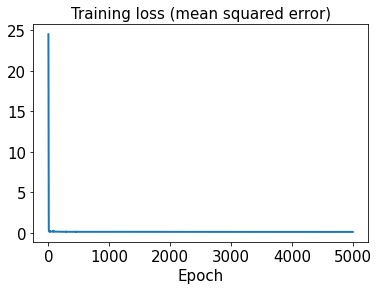

In [28]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

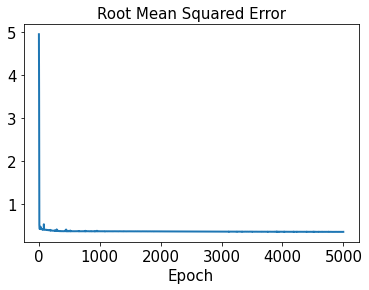

In [29]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [31]:
test_results = sd1.evaluate([out_train,aa_train])

11/11 [==============================] - 0s 2ms/step - loss: 1.5668e-06 - rmse: 0.0000e+00


In [32]:
decoded_train = sd1.predict([out_train,aa_train])

11/11 [==============================] - 0s 2ms/step


In [33]:
decoded_test = sd1.predict([out_test, aa_test])

15/15 [==============================] - 0s 4ms/step


In [34]:
error_train_abs = np.abs(decoded_train - y_train)

In [35]:
error_test_abs = np.abs(decoded_test - y_test)

In [36]:
l2_error_train = np.sqrt(np.sum((decoded_train - y_train)**2) / np.sum(y_train**2))
print(l2_error_train)

0.0684635869186579


In [37]:
l2_error_test = np.sqrt(np.sum((decoded_test - y_test)**2) / np.sum(y_test**2))
print(l2_error_test)

0.26821992243386733


In [38]:
l2_error_train_list = []
for i in range(0, len(aa_train)):
    l2_error_train_data = np.sqrt(np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2))
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.09312434417052777, 0.06586089010521186, 0.0691518574585777, 0.09457793969070771, 0.06489944617271184, 0.0845235647298404, 0.0684174739625219, 0.06374047839335871, 0.10612311532641629, 0.06393669358479111, 0.0719620198130147, 0.07712981829419441, 0.07643098427114876, 0.06672617166863105, 0.07840391427103362, 0.0788069033048774, 0.04512939403962509, 0.0693233539363021, 0.06779904397099655, 0.05885399388380961, 0.07809565507841203, 0.0640634816435047, 0.06320665366688728, 0.08012682782735342, 0.06814899872631588, 0.04038123157303014, 0.07083652318041508, 0.040323306486366575, 0.033926469810753326, 0.06816609064413541, 0.08628343145430802, 0.06755682456828085, 0.07090805429886869, 0.06625269134232786, 0.063641771876054, 0.06159756250845367, 0.04644160180775014, 0.06679265069459064, 0.06230705316118678, 0.06461202215640374, 0.05105684709893571, 0.061605471765729426, 0.03159533424228825, 0.0696660804894296, 0.06190772881226214, 0.05533957358131313, 0.0720775213569065, 0.06966352781385038,

In [39]:
l2_error_test_list = []
for i in range(0, len(aa_test)):
    l2_error_test_data = np.sqrt(np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2))
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.34791760301242164, 0.3009789487144724, 0.24598676838678565, 0.17810766859125368, 0.3449940551802277, 0.2936290925002234, 0.2370971895317275, 0.17559145197523718, 0.3283965250387782, 0.28220891080718674, 0.2549157768418409, 0.17741869851011882, 0.3346228630886704, 0.2983634380558107, 0.24752117760430725, 0.20191722466754844, 0.3364152119161325, 0.27890882615340845, 0.23241998848142215, 0.1788358573458357, 0.3296947409343223, 0.2829576515593227, 0.2363891742189518, 0.17501579901822376, 0.3294757640616043, 0.28755957582560443, 0.22830400944299822, 0.15868104566764632, 0.2720056744740091, 0.3057884159146763, 0.26306828357764594, 0.1879691988373366, 0.3109515243392373, 0.26867116433582766, 0.22957210851140666, 0.21035565995621555, 0.3468329573311588, 0.2990215974724352, 0.25563478000495216, 0.19025520533730955, 0.3147334010299267, 0.2878535237266744, 0.26493413704868024, 0.22381317956463273, 0.33942848114464136, 0.2956764634314761, 0.2521972401106866, 0.20045027434534146, 0.3229371590850

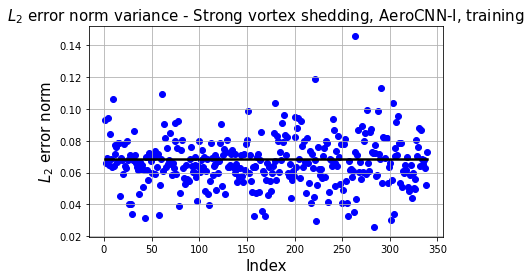

In [40]:
plt.plot(np.linspace(1, aa_train.shape[0], aa_train.shape[0]),
         l2_error_train*np.ones(aa_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_train.shape[0], aa_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Strong vortex shedding, AeroCNN-I, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

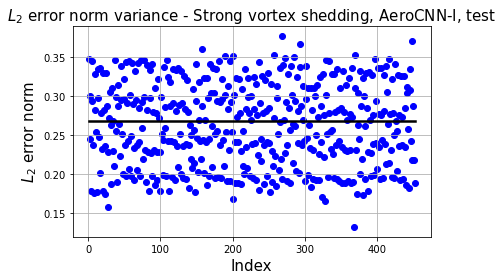

In [41]:
plt.plot(np.linspace(1, aa_test.shape[0], aa_test.shape[0]),
         l2_error_test*np.ones(aa_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, aa_test.shape[0], aa_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Strong vortex shedding, AeroCNN-I, test', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

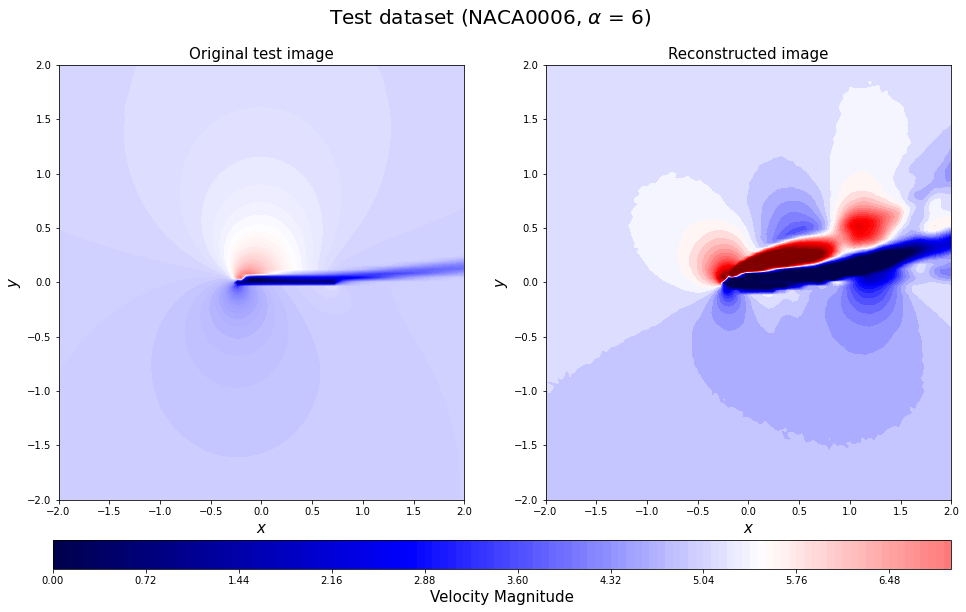

In [42]:
plt.figure(figsize=(16, 8))
y_test2_rotate = y_test[2].reshape(n_grid,n_grid)
decoded_rotate = decoded_test[2].reshape(n_grid,n_grid)

xrange = np.linspace(-2, 2, n_grid)
yrange = np.linspace(-2, 2, n_grid)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test2_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
#a1.set_clim(-0.7,0.7)
#|a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Velocity Magnitude', fontsize=15)
#cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset (%s, $\alpha$ = %d)' %(np.array2string(geo_test[2])[2:-2], aa_test[2]),fontsize=20)
plt.show()

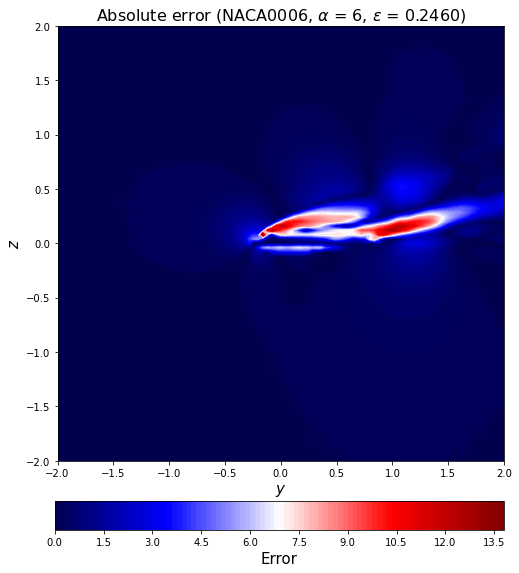

In [43]:
error_test_abs2_rotate = error_test_abs[2].reshape(n_grid,n_grid)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error (%s, $\alpha$ = %d, $\epsilon$ = %.4f)' %(np.array2string(geo_test[2])[2:-2],
                                                                       aa_test[2], l2_error_test_list[2]), fontsize=16)
ax5.set_xlabel('$y$', fontsize=15)
ax5.set_ylabel('$z$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

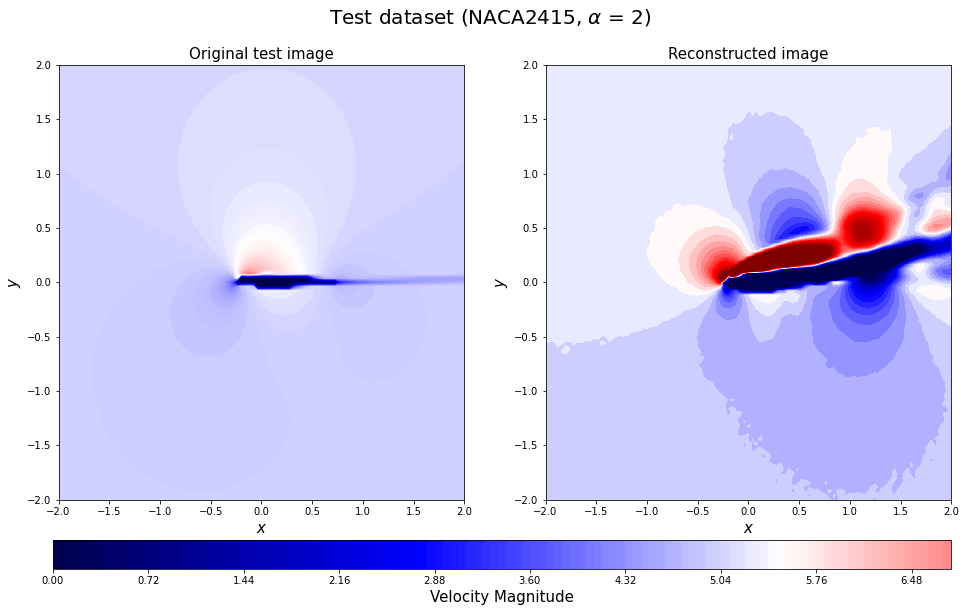

In [44]:
plt.figure(figsize=(16, 8))
y_test2_rotate = y_test[104].reshape(n_grid,n_grid)
decoded_rotate = decoded_test[104].reshape(n_grid,n_grid)

xrange = np.linspace(-2, 2, n_grid)
yrange = np.linspace(-2, 2, n_grid)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test2_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
#a1.set_clim(-0.7,0.7)
#|a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Velocity Magnitude', fontsize=15)
#cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset (%s, $\alpha$ = %d)' %(np.array2string(geo_test[104])[2:-2], aa_test[104]),fontsize=20)
plt.show()

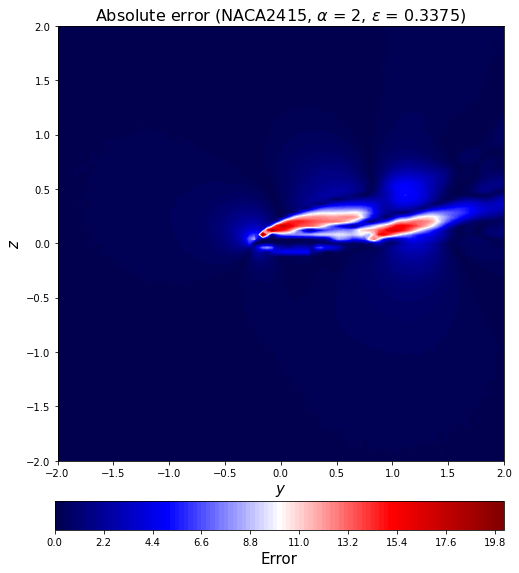

In [45]:
error_test_abs2_rotate = error_test_abs[104].reshape(n_grid,n_grid)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error (%s, $\alpha$ = %d, $\epsilon$ = %.4f)' %(np.array2string(geo_test[104])[2:-2],
                                                                       aa_test[104], l2_error_test_list[104]), fontsize=16)
ax5.set_xlabel('$y$', fontsize=15)
ax5.set_ylabel('$z$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

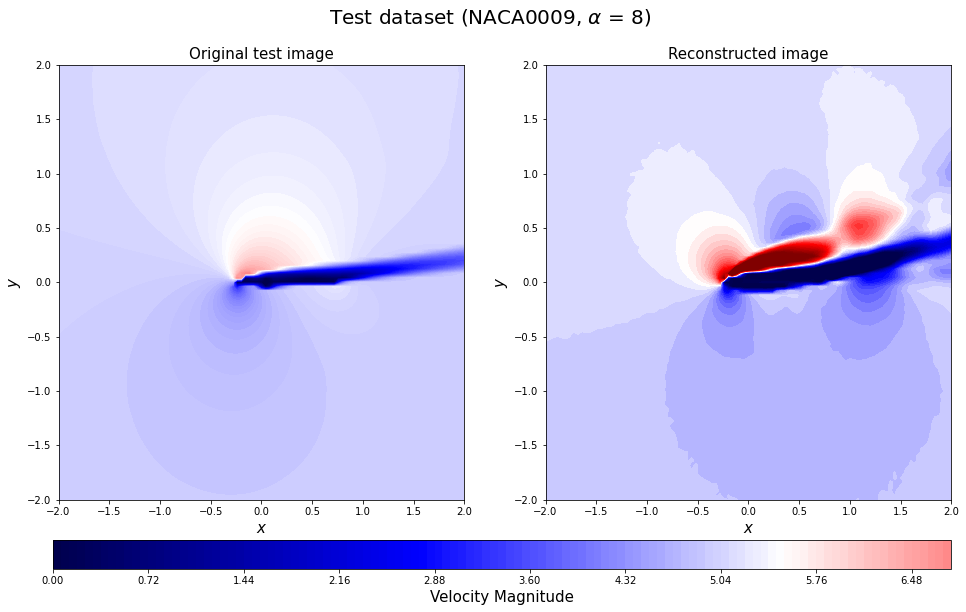

In [46]:
plt.figure(figsize=(16, 8))
y_test2_rotate = y_test[11].reshape(n_grid,n_grid)
decoded_rotate = decoded_test[11].reshape(n_grid,n_grid)

xrange = np.linspace(-2, 2, n_grid)
yrange = np.linspace(-2, 2, n_grid)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test2_rotate, levels=128, vmin=0, vmax=11, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, vmin=0, vmax=11, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
#a1.set_clim(-0.7,0.7)
#|a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Velocity Magnitude', fontsize=15)
#cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset (%s, $\alpha$ = %d)' %(np.array2string(geo_test[11])[2:-2], aa_test[11]),fontsize=20)
plt.show()

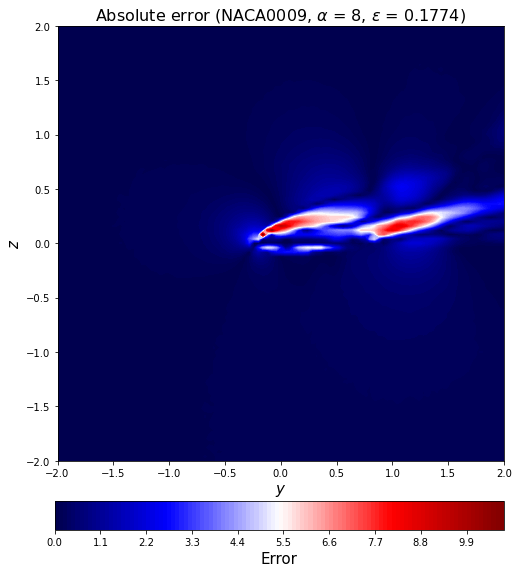

In [47]:
error_test_abs2_rotate = error_test_abs[11].reshape(n_grid,n_grid)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error (%s, $\alpha$ = %d, $\epsilon$ = %.4f)' %(np.array2string(geo_test[11])[2:-2],
                                                                       aa_test[11], l2_error_test_list[11]), fontsize=16)
ax5.set_xlabel('$y$', fontsize=15)
ax5.set_ylabel('$z$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

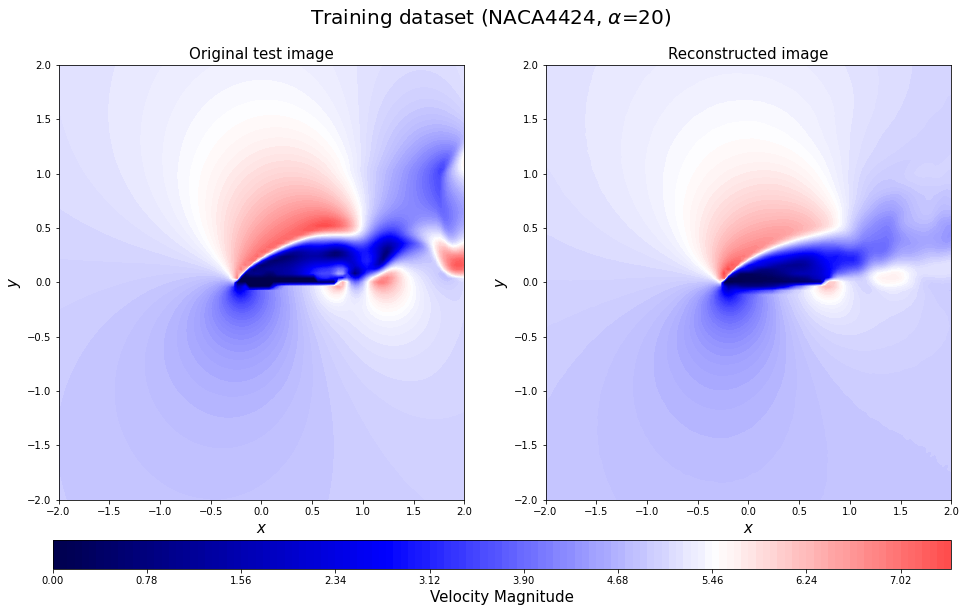

In [48]:
plt.figure(figsize=(16, 8))
y_test2_rotate = y_train[104].reshape(n_grid, n_grid)
decoded_rotate = decoded_train[104].reshape(n_grid, n_grid)

xrange = np.linspace(-2, 2, n_grid)
yrange = np.linspace(-2, 2, n_grid)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test2_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, vmin=0, vmax=11, levels=128, cmap='seismic')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
#a1.set_clim(-0.7,0.7)
#|a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Velocity Magnitude', fontsize=15)
#cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Training dataset (%s, $\alpha$=%d)' %(np.array2string(geo_train[104])[2:-2], aa_train[104]),fontsize=20)
plt.show()

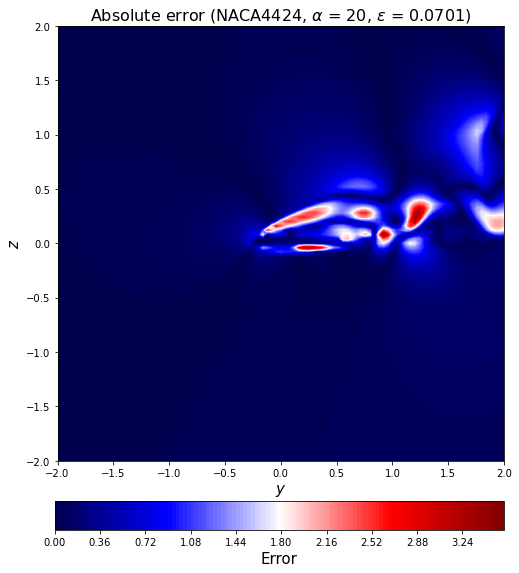

In [49]:
error_train_abs2_rotate = error_train_abs[104].reshape(n_grid,n_grid)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error (%s, $\alpha$ = %d, $\epsilon$ = %.4f)' %(np.array2string(geo_train[104])[2:-2],
                                                                       aa_train[104], l2_error_train_list[104]), fontsize=16)
ax5.set_xlabel('$y$', fontsize=15)
ax5.set_ylabel('$z$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()